In [ ]:
#Task2 : dictionary operations
student = {
    "name" : "Bilal Malik",
    "age"  : 22,
    "roll_number":"SP23-BSE-131",
    "grade" : "A"
}

print("Original Student Information:")
for key,value in student.items():
   print(f"{key} : {value}")

student["grade"]="A+"
student["email"]="bilalmalik@gmail.com;"
del student["roll_number"]
print("\nUpdated Student Information:")
for key,value in student.items():
 print(f"{key}:{value}")


Original Student Information:
name : Bilal Malik
age : 22
roll_number : SP23-BSE-131
grade : A

Updated Student Information:
name:Bilal Malik
age:22
grade:A+
email:bilalmalik@gmail.com;


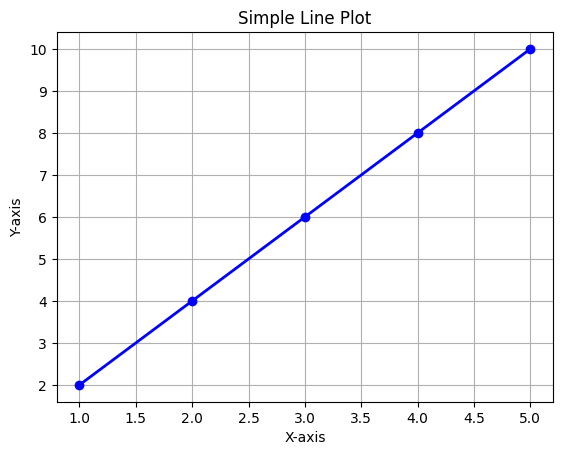

In [ ]:
#Task 3
import matplotlib.pyplot as plt

X=[1,2,3,4,5]
Y=[2,4,6,8,10]

plt.plot(X,Y,marker='o',color='blue',linewidth=2)

plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.grid(True)

plt.show()

In [10]:
# Task #5: Water Jug Problem

from collections import deque
import time

jug1, jug2, goal = 4, 3, 2

def bfs_water_jug():
    visited, queue, path = set(), deque([(0, 0)]), []
    while queue:
        a, b = queue.popleft()
        if (a, b) in visited:
            continue
        visited.add((a, b))
        path.append((a, b))
        if a == goal or b == goal:
            return path

        moves = [
            (jug1, b), (a, jug2),
            (0, b), (a, 0),
            (a - min(a, jug2 - b), b + min(a, jug2 - b)),
            (a + min(b, jug1 - a), b - min(b, jug1 - a))
        ]
        for m in moves:
            if m not in visited:
                queue.append(m)
    return None

def dfs_water_jug():
    visited, stack, path = set(), [(0, 0)], []
    while stack:
        a, b = stack.pop()
        if (a, b) in visited:
            continue
        visited.add((a, b))
        path.append((a, b))
        if a == goal or b == goal:
            return path
        moves = [
            (jug1, b), (a, jug2),
            (0, b), (a, 0),
            (a - min(a, jug2 - b), b + min(a, jug2 - b)),
            (a + min(b, jug1 - a), b - min(b, jug1 - a))
        ]
        for m in moves:
            if m not in visited:
                stack.append(m)
    return None


t0 = time.time(); bfs_result = bfs_water_jug(); bfs_time = time.time() - t0
t0 = time.time(); dfs_result = dfs_water_jug(); dfs_time = time.time() - t0

print("BFS Path:", bfs_result)
print("DFS Path:", dfs_result)
print(f"\nBFS Steps: {len(bfs_result)} | DFS Steps: {len(dfs_result)}")
print(f"BFS Time: {bfs_time:.6f}s | DFS Time: {dfs_time:.6f}s")


BFS Path: [(0, 0), (4, 0), (0, 3), (4, 3), (1, 3), (3, 0), (1, 0), (3, 3), (0, 1), (4, 2)]
DFS Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]

BFS Steps: 10 | DFS Steps: 5
BFS Time: 0.000101s | DFS Time: 0.000077s


In [13]:
# Task #6: A* Search Algorithm Maze
import heapq


def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def astar(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    open_set = [(0, start)]
    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, current = heapq.heappop(open_set)


        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]


        for dx, dy in [(0,1), (1,0), (-1,0), (0,-1)]:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
                neighbor = (nx, ny)
                new_cost = g_score[current] + 1
                if new_cost < g_score.get(neighbor, float('inf')):
                    g_score[neighbor] = new_cost
                    f_score = new_cost + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score, neighbor))
                    came_from[neighbor] = current
    return None


maze = [
    [0,1,0,0,0,0],
    [0,1,0,0,0,0],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0],
    [0,0,0,0,1,0],
    [1,1,0,1,0,0]
]

start = (0, 0)   # A
goal  = (5, 5)   # Y


path = astar(maze, start, goal)

print(" A* Path:", path)
if path:
    print(" Total Steps:", len(path))
else:
    print(" No path found")


✅ A* Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]
✅ Total Steps: 13
